In [3]:
pip install olefile

Note: you may need to restart the kernel to use updated packages.


In [4]:
import olefile
from glob import glob
datalist=glob("데이터/*.hwp")
documents = []
print(datalist)


['데이터\\D2007434.hwp', '데이터\\D2007902.hwp', '데이터\\R1406576.hwp', '데이터\\R1410137.hwp', '데이터\\R1507675.hwp', '데이터\\R2011581.hwp']


In [5]:
for path in datalist:
    f= olefile.OleFileIO(path)
    encoded_text = f.openstream('PrvText').read()
    decoded_text = encoded_text.decode('UTF-16')
    documents.append(decoded_text)

documents

['<2020년 7월 31일(금) 조간부터 보도하여 주시기 바랍니다. * 통신․방송․인터넷은 7월 30일(목) 14:00 이후 보도 가능>\r\n<><보도자료><>\r\n<∙문의 : 중소벤처기업부 제조혁신정책과 김우순 과장(044-865-9613), 김성진 사무관(9761)>\r\n\r\n< 스마트제조 2.0 본격 시동, 인공지능(AI) 활용한 제조 플랫폼 구축  - 제11차 인공지능(AI)․제조데이터 전략위원회 개최(7.30) -  □ 데이터 인프라, 전문가, 기업지원 서비스를 연결해 스마트공장의 인공지능(AI) 활용을 가속하는 ‘인공지능(AI) 중소벤처 제조 플랫폼(KAMP)’ 구축  □ 파급효과가 큰 뿌리기업 등의 핵심 설비·공정 중심으로 인공지능개발 박차    □ 제조데이터가 수익모델이 되는 마이제조데이터 디딤돌 될 것 >\r\n\r\n중소벤처기업부(장관 박영선, 이하 중기부)는 7월 30일 서울 대한상공회의소에서 제11차 인공지능(AI)·제조데이터 전략위원회(이하 전략위원회)를 개최하고 지난 7월 23일 정부가 발표한 ｢인공지능(AI)·데이터 기반 중소기업 제조혁신 고도화 전략(이하 고도화 전략)｣의 구체적인 실행방안에 대해 논의했다고 밝혔다.\r\n\r\n동 전략의 핵심기반이 되는 인공지능(AI) 중소벤처 제조 플랫폼(KAMP, Korea AI Manufacturing Platform)의 구축방안을 시작으로 논의가 진행됐다. \r\n\r\n인공지능(AI) 중소벤처 제조 플랫폼(KAMP)은 ①제조공정의 데이터를 수집·분석·활용하고 인공지능(AI)솔루션 개발을 지원하는 데이터 인프라와 ②인공지능(AI)전문가, 대학, 연구기관의 네트워크를 통합해 일컫는 것으로 중소기업의 인공지능(AI) 활용을 지원하는 플랫폼 역할을 하게 된다.  \r\n\r\n중기부는 올해 인공지능(AI) 중소벤처 제조 플랫폼(KAMP) 구축의 첫 단계로 민간 클라우드 사업자를 선정하고 뿌리산업 분야의 중소기업들이 많이 사용하는 컴퓨터 수치제어(CNC) 머신, 프레스 등 핵심설비의 데이

In [14]:
import re
from konlpy.tag import Mecab

mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")
SW=set()
SW.add("사무관")
SW.add("자료")
SW.add('보도')
SW.add("통신")
SW.add("과장")
def text_cleaning(doc):
    doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣]","",doc)
    return doc

def text_tokenizing(doc, tokenizer):
    if tokenizer =="noun":
        return [word for word in mecab.nouns(doc) if word not in SW and len(word)>1]
    elif tokenizer =="morph":
        return [word for word in mecab.morphs(doc) if word not in SW and len(word)>1 ]



cleaned_text = [text_cleaning(doc) for doc in documents]
tokenized_text = [text_tokenizing(doc,"noun") for doc in cleaned_text]

tokenized_text


[['월일',
  '금조',
  '방송',
  '인터넷',
  '일목',
  '후보',
  '가능',
  '중소',
  '벤처',
  '기업',
  '부제조',
  '혁신',
  '정책',
  '우순',
  '김성진',
  '스마트',
  '제조',
  '본격',
  '시동',
  '인공지능',
  '활용',
  '제조',
  '플랫',
  '구축',
  '제차',
  '인공지능',
  '제조',
  '데이터',
  '전략',
  '위원회',
  '개최',
  '데이터',
  '인프라',
  '전문가',
  '기업',
  '지원',
  '서비스',
  '연결',
  '스마트',
  '공장',
  '인공지능',
  '활용',
  '가속',
  '인공지능',
  '중소',
  '벤처',
  '제조',
  '플랫',
  '구축',
  '파급',
  '효과',
  '뿌리',
  '기업',
  '핵심',
  '설비',
  '공정',
  '중심',
  '인공지능',
  '개발',
  '박차',
  '제조',
  '데이터',
  '수익',
  '모델',
  '마이제',
  '데이터',
  '디딤돌',
  '중소',
  '벤처',
  '기업',
  '장관',
  '박영선',
  '하중기',
  '월일',
  '서울',
  '대한',
  '상공',
  '회의소',
  '제차',
  '인공지능',
  '제조',
  '데이터',
  '전략',
  '위원회',
  '이하',
  '전략',
  '위원회',
  '개최',
  '월일',
  '정부',
  '발표',
  '인공지능',
  '데이터',
  '기반',
  '중소기업',
  '제조',
  '혁신',
  '고도',
  '전략',
  '도화',
  '전략',
  '구체',
  '행방',
  '논의',
  '전략',
  '핵심',
  '기반',
  '인공지능',
  '중소',
  '벤처',
  '제조',
  '플랫',
  '구축',
  '방안',
  '시작',
  '논의',
  '진행',
  '인공지능',
  '중소',
  '벤처'

In [7]:
from collections import Counter

total_tokens = [token for doc in tokenized_text for token in doc]
print("Number of Total tokens : ", len(total_tokens))

token_counter = Counter(total_tokens)

noun_list = token_counter.most_common(50)
print(noun_list)

Number of Total tokens :  1083
[('제조', 40), ('스마트', 36), ('공장', 27), ('데이터', 25), ('혁신', 21), ('인공지능', 21), ('전략', 21), ('제조업', 19), ('추진', 17), ('기반', 16), ('기업', 15), ('표준', 15), ('중소', 12), ('구축', 12), ('산업', 11), ('생산', 11), ('보급', 11), ('중소기업', 10), ('활용', 9), ('경제', 9), ('확산', 9), ('플랫', 8), ('지원', 8), ('핵심', 8), ('고도', 8), ('사업', 8), ('정보', 8), ('벤처', 7), ('발표', 7), ('지능', 7), ('정책', 6), ('개발', 6), ('기술', 6), ('디지털', 6), ('창조', 6), ('한국', 6), ('월일', 5), ('중심', 5), ('위원회', 4), ('전문가', 4), ('공정', 4), ('정부', 4), ('수집', 4), ('분석', 4), ('실증', 4), ('본부', 4), ('과제', 4), ('업체', 4), ('전환', 4), ('시범', 4)]


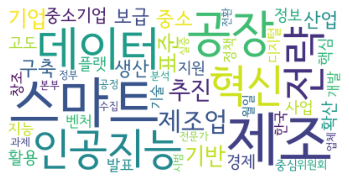

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc=WordCloud(font_path='SeoulNamsanM.ttf',background_color="white").generate_from_frequencies(dict(noun_list))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_docs = [" ".join(doc) for doc in tokenized_text]
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(tfidf_docs)
terms = tfidf.get_feature_names_out()
sums = X_tfidf.sum(axis=0)
df=[]
for col, term in enumerate(terms):
    df.append((term,sums[0,col]))

ranking = pd.DataFrame(df,columns=['Term','TF-IDF'])
rankinfo = ranking.sort_values('TF-IDF',ascending=False)
print(rankinfo[:50])



     Term    TF-IDF
328    제조  1.197778
220   스마트  0.927318
285  인공지능  0.895244
100   데이터  0.849285
329   제조업  0.770717
34     공장  0.689127
379    추진  0.637093
307    전략  0.610442
402    표준  0.580456
426    혁신  0.577448
69     기반  0.574408
320    정보  0.492190
153    보급  0.433238
346    중소  0.395340
72     기업  0.388835
179    산업  0.360665
174    사업  0.355899
185    생산  0.348459
347  중소기업  0.345228
50     구축  0.340155
434    확산  0.312426
437    활용  0.306278
149    벤처  0.304026
410    플랫  0.299273
21     경제  0.298576
416    한국  0.292871
355    지원  0.292489
352    지능  0.271512
27     고도  0.269972
113   디지털  0.266449
368    창조  0.253812
397   팩토리  0.246095
269    월일  0.240571
141    발표  0.236172
419    핵심  0.235349
70     기술  0.221306
9      개발  0.217358
296   자동차  0.212953
223    시범  0.209559
322    정책  0.203229
39     과제  0.202500
314    전환  0.201674
133    미래  0.196473
348    중심  0.196264
37     공정  0.183671
272   위원회  0.182363
239    업체  0.181369
63    글로벌  0.172131
215    수집  0.171611


c:\Users\master\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
pip install pyldavis==3.2.2

     ---------------------------------------- 1.7/1.7 MB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 92.5/92.5 kB ? eta 0:00:00
  Created wheel for pyldavis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135591 sha256=387dfd7b9a83bbc403695d2d1cd751258558a986f441335e709a51238c12cce6
  Stored in directory: c:\users\master\appdata\local\pip\cache\wheels\2a\5b\b3\26b52781cdeea9c815e147cfd4ac4a0a3472bce92142115670
Successfully built pyldavis
Note: you may need to restart the kernel to use updated packages.


In [15]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_text)
print(dictionary)

Dictionary<445 unique tokens: ['가능', '가속', '개발', '개최', '고도']...>


In [16]:
corpus = [dictionary.doc2bow(text) for text in tokenized_text]
print('corpus : {}'.format(corpus))


corpus : [[(0, 1), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1), (6, 2), (7, 1), (8, 5), (9, 1), (10, 1), (11, 2), (12, 4), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 9), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 6), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 2), (46, 3), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 3), (60, 3), (61, 1), (62, 14), (63, 1), (64, 2), (65, 1), (66, 1), (67, 6), (68, 3), (69, 1), (70, 1), (71, 1), (72, 11), (73, 2), (74, 1), (75, 6), (76, 3), (77, 1), (78, 4), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 6), (87, 1), (88, 3), (89, 1), (90, 2), (91, 4), (92, 1), (93, 1), (94, 1)], [(2, 1), (4, 1), (5, 2), (8, 1), (11, 7), (12, 2), (19, 7), (32, 1), (35, 2), (40, 1), (42, 1), (48, 2), (50, 3), (54, 1), (67, 1), (72, 11),